# 4.10 Task Part 1

# Table of Contents
- Task 1: import data
- Task 2: address security implications
- Task 3: create region flag
- Task 3.2: create crosstab for region and spender_flag
- Task 4: create and export new dataset that excludes low-activity customers
- Task 5: create customer profiling groups
>- Age group
>- Income group
>- Department ID group
>- Number of Dependants
>- Order Day of Week
>- Order Hour of Day
- Task 6: Customer Profile Visualizations
- Task 7: Aggregations

In [3]:
# importing libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

## 1. Import the data set you exported in Exercise 4.9 into a new Jupyter notebook.

In [5]:
# importing data
path = r'C:\Users\nrsmi\OneDrive\Documents\CareerFoundry\06-2024 Instacart Basket Analysis\Python\06-2024 Instacart Basket Analysis'
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_customer_agg.pkl'))

In [6]:
df.shape

(32404859, 33)

In [7]:
# enable display all columns
pd.options.display.max_columns = None

In [8]:
df.head(5)

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,busiest_day,price_range_loc,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_spend,spender_flag,order_frequency,Customer_frequency_flag,first_name,last_name,gender,state,age,date_joined,number_of_dependants,marital_status,income,_merge
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,3.0,5,0,Regularly busy,Mid-range product,Regularly busy,Most orders,32,Regular customer,6.935811,Low spender,8.0,Frequent customer,Charles,Cox,Male,Minnesota,81,2019-08-01,1,married,49620,both
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,20.0,1,1,Regularly busy,Mid-range product,Regularly busy,Average orders,32,Regular customer,6.935811,Low spender,8.0,Frequent customer,Charles,Cox,Male,Minnesota,81,2019-08-01,1,married,49620,both
2,1,Chocolate Sandwich Cookies,61,19,5.8,389851,709,2,0,21,6.0,20,0,Busiest day,Mid-range product,Busiest days,Average orders,5,New customer,7.930208,Low spender,8.0,Frequent customer,Deborah,Glass,Female,Vermont,66,2018-06-16,2,married,158302,both
3,1,Chocolate Sandwich Cookies,61,19,5.8,652770,764,1,3,13,NaN,10,0,Regularly busy,Mid-range product,Slowest days,Most orders,3,New customer,4.972414,Low spender,9.0,Frequent customer,Heather,Myers,Female,Wisconsin,40,2020-02-09,3,married,31308,both
4,1,Chocolate Sandwich Cookies,61,19,5.8,1813452,764,3,4,17,9.0,11,1,Least busy,Mid-range product,Slowest days,Average orders,3,New customer,4.972414,Low spender,9.0,Frequent customer,Heather,Myers,Female,Wisconsin,40,2020-02-09,3,married,31308,both


## 2. Consider any security implications that might exist for this new data. You’ll need to address any PII data in the data before continuing your analysis.

#### In order to omit personal information, the columns for 'first_name' and 'last_name' would need to be removed, but only after being approved by higher-ups to make this change.

## 3. The Instacart officers are interested in comparing customer behavior in different geographic areas. Create a regional segmentation of the data. You’ll need to create a “Region” column based on the “State” column from your customers data set..)

In [12]:
# create a list of states for each region
northeast = ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']
midwest = ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']
south = ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']
west = ['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii']

In [13]:
# create Region flag

df.loc[df['state'].isin(northeast), 'region'] = 'Northeast'
df.loc[df['state'].isin(midwest), 'region'] = 'Midwest'
df.loc[df['state'].isin(south), 'region'] = 'South'
df.loc[df['state'].isin(west), 'region'] = 'West'

In [14]:
df.head(5)

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,busiest_day,price_range_loc,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_spend,spender_flag,order_frequency,Customer_frequency_flag,first_name,last_name,gender,state,age,date_joined,number_of_dependants,marital_status,income,_merge,region
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,3.0,5,0,Regularly busy,Mid-range product,Regularly busy,Most orders,32,Regular customer,6.935811,Low spender,8.0,Frequent customer,Charles,Cox,Male,Minnesota,81,2019-08-01,1,married,49620,both,Midwest
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,20.0,1,1,Regularly busy,Mid-range product,Regularly busy,Average orders,32,Regular customer,6.935811,Low spender,8.0,Frequent customer,Charles,Cox,Male,Minnesota,81,2019-08-01,1,married,49620,both,Midwest
2,1,Chocolate Sandwich Cookies,61,19,5.8,389851,709,2,0,21,6.0,20,0,Busiest day,Mid-range product,Busiest days,Average orders,5,New customer,7.930208,Low spender,8.0,Frequent customer,Deborah,Glass,Female,Vermont,66,2018-06-16,2,married,158302,both,Northeast
3,1,Chocolate Sandwich Cookies,61,19,5.8,652770,764,1,3,13,NaN,10,0,Regularly busy,Mid-range product,Slowest days,Most orders,3,New customer,4.972414,Low spender,9.0,Frequent customer,Heather,Myers,Female,Wisconsin,40,2020-02-09,3,married,31308,both,Midwest
4,1,Chocolate Sandwich Cookies,61,19,5.8,1813452,764,3,4,17,9.0,11,1,Least busy,Mid-range product,Slowest days,Average orders,3,New customer,4.972414,Low spender,9.0,Frequent customer,Heather,Myers,Female,Wisconsin,40,2020-02-09,3,married,31308,both,Midwest


In [15]:
df['region'].value_counts(dropna = False)

region
South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: count, dtype: int64

## 3.2 Determine whether there’s a difference in spending habits between the different U.S. regions. (Hint: You can do this by crossing the variable you just created with the spending flag.)

In [17]:
# create crosstab between 'region' and 'spender_flag'

regional_spending_flag = pd.crosstab(df['region'], df['spender_flag'], dropna = False)

In [18]:
regional_spending_flag

spender_flag,High spender,Low spender
region,,
Midwest,29265,7568060
Northeast,18642,5704094
South,40564,10751321
West,31223,8261690


#### explanation

## 4. The Instacart CFO isn’t interested in customers who don’t generate much revenue for the app. Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data. Make sure you export this sample.

In [21]:
# Exclusion flag based on orders

df.loc[df['max_order'] < 5, 'activity_flag'] = 'low-activity'
df.loc[df['max_order'] >= 5, 'activity_flag'] = 'high-activity'

In [22]:
df.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,busiest_day,price_range_loc,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_spend,spender_flag,order_frequency,Customer_frequency_flag,first_name,last_name,gender,state,age,date_joined,number_of_dependants,marital_status,income,_merge,region,activity_flag
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,3.0,5,0,Regularly busy,Mid-range product,Regularly busy,Most orders,32,Regular customer,6.935811,Low spender,8.0,Frequent customer,Charles,Cox,Male,Minnesota,81,2019-08-01,1,married,49620,both,Midwest,high-activity
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,20.0,1,1,Regularly busy,Mid-range product,Regularly busy,Average orders,32,Regular customer,6.935811,Low spender,8.0,Frequent customer,Charles,Cox,Male,Minnesota,81,2019-08-01,1,married,49620,both,Midwest,high-activity
2,1,Chocolate Sandwich Cookies,61,19,5.8,389851,709,2,0,21,6.0,20,0,Busiest day,Mid-range product,Busiest days,Average orders,5,New customer,7.930208,Low spender,8.0,Frequent customer,Deborah,Glass,Female,Vermont,66,2018-06-16,2,married,158302,both,Northeast,high-activity
3,1,Chocolate Sandwich Cookies,61,19,5.8,652770,764,1,3,13,NaN,10,0,Regularly busy,Mid-range product,Slowest days,Most orders,3,New customer,4.972414,Low spender,9.0,Frequent customer,Heather,Myers,Female,Wisconsin,40,2020-02-09,3,married,31308,both,Midwest,low-activity
4,1,Chocolate Sandwich Cookies,61,19,5.8,1813452,764,3,4,17,9.0,11,1,Least busy,Mid-range product,Slowest days,Average orders,3,New customer,4.972414,Low spender,9.0,Frequent customer,Heather,Myers,Female,Wisconsin,40,2020-02-09,3,married,31308,both,Midwest,low-activity


In [23]:
# check activity flag

df['activity_flag'].value_counts(dropna = False)

activity_flag
high-activity    30964564
low-activity      1440295
Name: count, dtype: int64

In [24]:
# create new dataframe with only high-activity customers

df_high_activity_customers_only = df[df['activity_flag'] == 'high-activity']

In [25]:
df_high_activity_customers_only.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,busiest_day,price_range_loc,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_spend,spender_flag,order_frequency,Customer_frequency_flag,first_name,last_name,gender,state,age,date_joined,number_of_dependants,marital_status,income,_merge,region,activity_flag
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,3.0,5,0,Regularly busy,Mid-range product,Regularly busy,Most orders,32,Regular customer,6.935811,Low spender,8.0,Frequent customer,Charles,Cox,Male,Minnesota,81,2019-08-01,1,married,49620,both,Midwest,high-activity
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,20.0,1,1,Regularly busy,Mid-range product,Regularly busy,Average orders,32,Regular customer,6.935811,Low spender,8.0,Frequent customer,Charles,Cox,Male,Minnesota,81,2019-08-01,1,married,49620,both,Midwest,high-activity
2,1,Chocolate Sandwich Cookies,61,19,5.8,389851,709,2,0,21,6.0,20,0,Busiest day,Mid-range product,Busiest days,Average orders,5,New customer,7.930208,Low spender,8.0,Frequent customer,Deborah,Glass,Female,Vermont,66,2018-06-16,2,married,158302,both,Northeast,high-activity
5,1,Chocolate Sandwich Cookies,61,19,5.8,1701441,777,16,1,7,26.0,7,0,Regularly busy,Mid-range product,Busiest days,Average orders,26,Regular customer,6.935398,Low spender,11.0,Regular customer,Christina,Wallace,Female,Hawaii,51,2019-01-04,2,married,57797,both,West,high-activity
6,1,Chocolate Sandwich Cookies,61,19,5.8,1871483,825,3,2,14,30.0,2,0,Regularly busy,Mid-range product,Regularly busy,Most orders,9,New customer,5.957576,Low spender,20.0,Regular customer,nan,Parks,Male,District of Columbia,20,2019-05-08,3,living with parents and siblings,34171,both,South,high-activity


In [26]:
df_high_activity_customers_only.shape

(30964564, 35)

In [27]:
# export 'df_high_activity_customers_only' to file

df_high_activity_customers_only.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'df_high_activity_customers_only.pkl'))

## 5. The marketing and business strategy units at Instacart want to create more-relevant marketing strategies for different products and are, thus, curious about customer profiling in their database. Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents. You might also use the “orders_day_of_week” and “order_hour_of_day” columns if you can think of a way they would impact customer profiles. (Hint: As an example, try thinking of what characteristics would lead you to the profile “Single adult” or “Young parent.”)

In [29]:
#import new dataframe 

df_2 = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'df_high_activity_customers_only.pkl'))

### Age Group

In [31]:
# create profile based on age

df_2.loc[df_2['age'] <= 30, 'age_group'] = 'Young Adult'
df_2.loc[(df_2['age'] >30) & (df_2['age'] <65), 'age_group'] = 'Middle-Aged'
df_2.loc[df_2['age'] >= 65, 'age_group'] = 'Senior'

In [32]:
df_2.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,busiest_day,price_range_loc,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_spend,spender_flag,order_frequency,Customer_frequency_flag,first_name,last_name,gender,state,age,date_joined,number_of_dependants,marital_status,income,_merge,region,activity_flag,age_group
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,3.0,5,0,Regularly busy,Mid-range product,Regularly busy,Most orders,32,Regular customer,6.935811,Low spender,8.0,Frequent customer,Charles,Cox,Male,Minnesota,81,2019-08-01,1,married,49620,both,Midwest,high-activity,Senior
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,20.0,1,1,Regularly busy,Mid-range product,Regularly busy,Average orders,32,Regular customer,6.935811,Low spender,8.0,Frequent customer,Charles,Cox,Male,Minnesota,81,2019-08-01,1,married,49620,both,Midwest,high-activity,Senior
2,1,Chocolate Sandwich Cookies,61,19,5.8,389851,709,2,0,21,6.0,20,0,Busiest day,Mid-range product,Busiest days,Average orders,5,New customer,7.930208,Low spender,8.0,Frequent customer,Deborah,Glass,Female,Vermont,66,2018-06-16,2,married,158302,both,Northeast,high-activity,Senior
5,1,Chocolate Sandwich Cookies,61,19,5.8,1701441,777,16,1,7,26.0,7,0,Regularly busy,Mid-range product,Busiest days,Average orders,26,Regular customer,6.935398,Low spender,11.0,Regular customer,Christina,Wallace,Female,Hawaii,51,2019-01-04,2,married,57797,both,West,high-activity,Middle-Aged
6,1,Chocolate Sandwich Cookies,61,19,5.8,1871483,825,3,2,14,30.0,2,0,Regularly busy,Mid-range product,Regularly busy,Most orders,9,New customer,5.957576,Low spender,20.0,Regular customer,nan,Parks,Male,District of Columbia,20,2019-05-08,3,living with parents and siblings,34171,both,South,high-activity,Young Adult


In [33]:
df_2['age_group'].value_counts(dropna = False)

age_group
Middle-Aged    16464780
Senior          8195544
Young Adult     6304240
Name: count, dtype: int64

### Income Group

<Axes: ylabel='Frequency'>

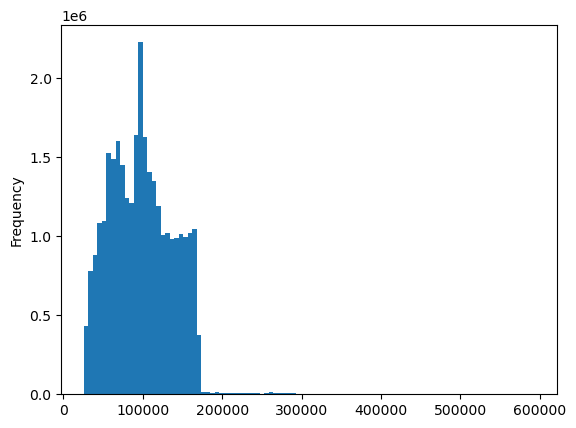

In [35]:
df_2[('income')].plot.hist(bins = 100)

In [36]:
# create profile based on income

df_2.loc[df_2['income'] <= 60000, 'income_group'] = 'low-income'
df_2.loc[(df_2['income'] >60000) & (df_2['income'] <150000), 'income_group'] = 'mid-income'
df_2.loc[df_2['income'] >= 150000, 'income_group'] = 'high-income'

In [37]:
df_2.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,busiest_day,price_range_loc,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_spend,spender_flag,order_frequency,Customer_frequency_flag,first_name,last_name,gender,state,age,date_joined,number_of_dependants,marital_status,income,_merge,region,activity_flag,age_group,income_group
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,3.0,5,0,Regularly busy,Mid-range product,Regularly busy,Most orders,32,Regular customer,6.935811,Low spender,8.0,Frequent customer,Charles,Cox,Male,Minnesota,81,2019-08-01,1,married,49620,both,Midwest,high-activity,Senior,low-income
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,20.0,1,1,Regularly busy,Mid-range product,Regularly busy,Average orders,32,Regular customer,6.935811,Low spender,8.0,Frequent customer,Charles,Cox,Male,Minnesota,81,2019-08-01,1,married,49620,both,Midwest,high-activity,Senior,low-income
2,1,Chocolate Sandwich Cookies,61,19,5.8,389851,709,2,0,21,6.0,20,0,Busiest day,Mid-range product,Busiest days,Average orders,5,New customer,7.930208,Low spender,8.0,Frequent customer,Deborah,Glass,Female,Vermont,66,2018-06-16,2,married,158302,both,Northeast,high-activity,Senior,high-income
5,1,Chocolate Sandwich Cookies,61,19,5.8,1701441,777,16,1,7,26.0,7,0,Regularly busy,Mid-range product,Busiest days,Average orders,26,Regular customer,6.935398,Low spender,11.0,Regular customer,Christina,Wallace,Female,Hawaii,51,2019-01-04,2,married,57797,both,West,high-activity,Middle-Aged,low-income
6,1,Chocolate Sandwich Cookies,61,19,5.8,1871483,825,3,2,14,30.0,2,0,Regularly busy,Mid-range product,Regularly busy,Most orders,9,New customer,5.957576,Low spender,20.0,Regular customer,nan,Parks,Male,District of Columbia,20,2019-05-08,3,living with parents and siblings,34171,both,South,high-activity,Young Adult,low-income


In [38]:
df_2['income_group'].value_counts(dropna = False)

income_group
mid-income     21265988
low-income      5803301
high-income     3895275
Name: count, dtype: int64

### Department ID Group

In [40]:
# pull data dictionary from previous exercise to check department ids

df_dept = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'departments_wrangled.csv'), index_col = False)

In [41]:
df_dept

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [42]:
#Rename unnamed column to department_id
df_dept.rename(columns = {'Unnamed: 0' : 'department_id'}, inplace = True)

In [43]:
df_dept

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [44]:
# create categories for department id group

df_2.loc[df_2['department_id'].isin([1, 3, 4, 5, 6, 7, 9, 10, 14, 15, 16, 19, 20]), 'department_group'] = 'groceries'
df_2.loc[df_2['department_id'].isin([11, 17]), 'department_group'] = 'personal_care'
df_2.loc[df_2['department_id'].isin([12]), 'department_group'] = 'meat_seafood'
df_2.loc[df_2['department_id'].isin([8, 18]), 'department_group'] = 'baby_pet'
df_2.loc[df_2['department_id'].isin([2, 13, 21]), 'department_group'] = 'miscellaneous'

In [45]:
df_2.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,busiest_day,price_range_loc,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_spend,spender_flag,order_frequency,Customer_frequency_flag,first_name,last_name,gender,state,age,date_joined,number_of_dependants,marital_status,income,_merge,region,activity_flag,age_group,income_group,department_group
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,3.0,5,0,Regularly busy,Mid-range product,Regularly busy,Most orders,32,Regular customer,6.935811,Low spender,8.0,Frequent customer,Charles,Cox,Male,Minnesota,81,2019-08-01,1,married,49620,both,Midwest,high-activity,Senior,low-income,groceries
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,20.0,1,1,Regularly busy,Mid-range product,Regularly busy,Average orders,32,Regular customer,6.935811,Low spender,8.0,Frequent customer,Charles,Cox,Male,Minnesota,81,2019-08-01,1,married,49620,both,Midwest,high-activity,Senior,low-income,groceries
2,1,Chocolate Sandwich Cookies,61,19,5.8,389851,709,2,0,21,6.0,20,0,Busiest day,Mid-range product,Busiest days,Average orders,5,New customer,7.930208,Low spender,8.0,Frequent customer,Deborah,Glass,Female,Vermont,66,2018-06-16,2,married,158302,both,Northeast,high-activity,Senior,high-income,groceries
5,1,Chocolate Sandwich Cookies,61,19,5.8,1701441,777,16,1,7,26.0,7,0,Regularly busy,Mid-range product,Busiest days,Average orders,26,Regular customer,6.935398,Low spender,11.0,Regular customer,Christina,Wallace,Female,Hawaii,51,2019-01-04,2,married,57797,both,West,high-activity,Middle-Aged,low-income,groceries
6,1,Chocolate Sandwich Cookies,61,19,5.8,1871483,825,3,2,14,30.0,2,0,Regularly busy,Mid-range product,Regularly busy,Most orders,9,New customer,5.957576,Low spender,20.0,Regular customer,nan,Parks,Male,District of Columbia,20,2019-05-08,3,living with parents and siblings,34171,both,South,high-activity,Young Adult,low-income,groceries


In [46]:
df_2['department_group'].value_counts(dropna = False)

department_group
groceries        26780284
miscellaneous     1881884
personal_care     1124163
meat_seafood       674781
baby_pet           503452
Name: count, dtype: int64

### Number of Dependents

<Axes: xlabel='number_of_dependants'>

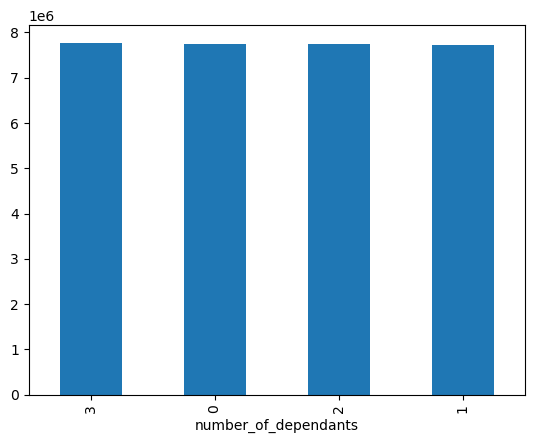

In [48]:
df_2['number_of_dependants'].value_counts().plot.bar()

In [49]:
# create profile based on number of dependants

df_2.loc[df_2['number_of_dependants'] <1, 'household_size'] = 'small'
df_2.loc[(df_2['number_of_dependants'] >=1) & (df_2['number_of_dependants'] <=2), 'household_size'] = 'mid-sized'
df_2.loc[df_2['number_of_dependants'] >= 3, 'household_size'] = 'large'

In [50]:
df_2.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,busiest_day,price_range_loc,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_spend,spender_flag,order_frequency,Customer_frequency_flag,first_name,last_name,gender,state,age,date_joined,number_of_dependants,marital_status,income,_merge,region,activity_flag,age_group,income_group,department_group,household_size
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,3.0,5,0,Regularly busy,Mid-range product,Regularly busy,Most orders,32,Regular customer,6.935811,Low spender,8.0,Frequent customer,Charles,Cox,Male,Minnesota,81,2019-08-01,1,married,49620,both,Midwest,high-activity,Senior,low-income,groceries,mid-sized
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,20.0,1,1,Regularly busy,Mid-range product,Regularly busy,Average orders,32,Regular customer,6.935811,Low spender,8.0,Frequent customer,Charles,Cox,Male,Minnesota,81,2019-08-01,1,married,49620,both,Midwest,high-activity,Senior,low-income,groceries,mid-sized
2,1,Chocolate Sandwich Cookies,61,19,5.8,389851,709,2,0,21,6.0,20,0,Busiest day,Mid-range product,Busiest days,Average orders,5,New customer,7.930208,Low spender,8.0,Frequent customer,Deborah,Glass,Female,Vermont,66,2018-06-16,2,married,158302,both,Northeast,high-activity,Senior,high-income,groceries,mid-sized
5,1,Chocolate Sandwich Cookies,61,19,5.8,1701441,777,16,1,7,26.0,7,0,Regularly busy,Mid-range product,Busiest days,Average orders,26,Regular customer,6.935398,Low spender,11.0,Regular customer,Christina,Wallace,Female,Hawaii,51,2019-01-04,2,married,57797,both,West,high-activity,Middle-Aged,low-income,groceries,mid-sized
6,1,Chocolate Sandwich Cookies,61,19,5.8,1871483,825,3,2,14,30.0,2,0,Regularly busy,Mid-range product,Regularly busy,Most orders,9,New customer,5.957576,Low spender,20.0,Regular customer,nan,Parks,Male,District of Columbia,20,2019-05-08,3,living with parents and siblings,34171,both,South,high-activity,Young Adult,low-income,groceries,large


In [51]:
df_2['household_size'].value_counts(dropna = False)

household_size
mid-sized    15452367
large         7772516
small         7739681
Name: count, dtype: int64

### Order Day of Week

In [53]:
# create day_of_order_group

df_2.loc[df_2['orders_day_of_week'].isin([2, 3, 4, 5, 6]), 'day_of_order_group'] = 'weekday'
df_2.loc[df_2['orders_day_of_week'].isin([0, 1]), 'day_of_order_group'] = 'weekend'

In [54]:
df_2.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,busiest_day,price_range_loc,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_spend,spender_flag,order_frequency,Customer_frequency_flag,first_name,last_name,gender,state,age,date_joined,number_of_dependants,marital_status,income,_merge,region,activity_flag,age_group,income_group,department_group,household_size,day_of_order_group
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,3.0,5,0,Regularly busy,Mid-range product,Regularly busy,Most orders,32,Regular customer,6.935811,Low spender,8.0,Frequent customer,Charles,Cox,Male,Minnesota,81,2019-08-01,1,married,49620,both,Midwest,high-activity,Senior,low-income,groceries,mid-sized,weekday
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,20.0,1,1,Regularly busy,Mid-range product,Regularly busy,Average orders,32,Regular customer,6.935811,Low spender,8.0,Frequent customer,Charles,Cox,Male,Minnesota,81,2019-08-01,1,married,49620,both,Midwest,high-activity,Senior,low-income,groceries,mid-sized,weekday
2,1,Chocolate Sandwich Cookies,61,19,5.8,389851,709,2,0,21,6.0,20,0,Busiest day,Mid-range product,Busiest days,Average orders,5,New customer,7.930208,Low spender,8.0,Frequent customer,Deborah,Glass,Female,Vermont,66,2018-06-16,2,married,158302,both,Northeast,high-activity,Senior,high-income,groceries,mid-sized,weekend
5,1,Chocolate Sandwich Cookies,61,19,5.8,1701441,777,16,1,7,26.0,7,0,Regularly busy,Mid-range product,Busiest days,Average orders,26,Regular customer,6.935398,Low spender,11.0,Regular customer,Christina,Wallace,Female,Hawaii,51,2019-01-04,2,married,57797,both,West,high-activity,Middle-Aged,low-income,groceries,mid-sized,weekend
6,1,Chocolate Sandwich Cookies,61,19,5.8,1871483,825,3,2,14,30.0,2,0,Regularly busy,Mid-range product,Regularly busy,Most orders,9,New customer,5.957576,Low spender,20.0,Regular customer,nan,Parks,Male,District of Columbia,20,2019-05-08,3,living with parents and siblings,34171,both,South,high-activity,Young Adult,low-income,groceries,large,weekday


In [55]:
df_2['day_of_order_group'].value_counts(dropna = False)

day_of_order_group
weekday    19644268
weekend    11320296
Name: count, dtype: int64

### Order Hour of Day

In [57]:
df_2['order_hour_of_day'].value_counts(dropna = False)

order_hour_of_day
10    2649744
11    2614880
14    2567903
13    2539276
15    2535966
12    2495795
16    2413681
9     2363611
17    1982345
8     1659110
18    1551184
19    1193878
20     930909
7      863213
21     763111
22     607060
23     384554
6      281013
0      208042
1      109621
5       84418
2       65691
4       50763
3       48796
Name: count, dtype: int64

In [58]:
# create group based on order hour of day

df_2.loc[df_2['order_hour_of_day'] <5 , 'hour_of_order_group'] = 'late night'
df_2.loc[df_2['order_hour_of_day'] >22, 'hour_of_order_group'] = 'late night'
df_2.loc[(df_2['order_hour_of_day'] >=5) & (df_2['order_hour_of_day'] <12), 'hour_of_order_group'] = 'morning'
df_2.loc[(df_2['order_hour_of_day'] >=12) & (df_2['order_hour_of_day'] <18), 'hour_of_order_group'] = 'afternoon'
df_2.loc[(df_2['order_hour_of_day'] >=18) & (df_2['order_hour_of_day'] <=22), 'hour_of_order_group'] = 'evening'

In [59]:
df_2.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,busiest_day,price_range_loc,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_spend,spender_flag,order_frequency,Customer_frequency_flag,first_name,last_name,gender,state,age,date_joined,number_of_dependants,marital_status,income,_merge,region,activity_flag,age_group,income_group,department_group,household_size,day_of_order_group,hour_of_order_group
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,3.0,5,0,Regularly busy,Mid-range product,Regularly busy,Most orders,32,Regular customer,6.935811,Low spender,8.0,Frequent customer,Charles,Cox,Male,Minnesota,81,2019-08-01,1,married,49620,both,Midwest,high-activity,Senior,low-income,groceries,mid-sized,weekday,morning
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,20.0,1,1,Regularly busy,Mid-range product,Regularly busy,Average orders,32,Regular customer,6.935811,Low spender,8.0,Frequent customer,Charles,Cox,Male,Minnesota,81,2019-08-01,1,married,49620,both,Midwest,high-activity,Senior,low-income,groceries,mid-sized,weekday,afternoon
2,1,Chocolate Sandwich Cookies,61,19,5.8,389851,709,2,0,21,6.0,20,0,Busiest day,Mid-range product,Busiest days,Average orders,5,New customer,7.930208,Low spender,8.0,Frequent customer,Deborah,Glass,Female,Vermont,66,2018-06-16,2,married,158302,both,Northeast,high-activity,Senior,high-income,groceries,mid-sized,weekend,evening
5,1,Chocolate Sandwich Cookies,61,19,5.8,1701441,777,16,1,7,26.0,7,0,Regularly busy,Mid-range product,Busiest days,Average orders,26,Regular customer,6.935398,Low spender,11.0,Regular customer,Christina,Wallace,Female,Hawaii,51,2019-01-04,2,married,57797,both,West,high-activity,Middle-Aged,low-income,groceries,mid-sized,weekend,morning
6,1,Chocolate Sandwich Cookies,61,19,5.8,1871483,825,3,2,14,30.0,2,0,Regularly busy,Mid-range product,Regularly busy,Most orders,9,New customer,5.957576,Low spender,20.0,Regular customer,nan,Parks,Male,District of Columbia,20,2019-05-08,3,living with parents and siblings,34171,both,South,high-activity,Young Adult,low-income,groceries,large,weekday,afternoon


In [60]:
df_2['hour_of_order_group'].value_counts(dropna = False)

hour_of_order_group
afternoon     14534966
morning       10515989
evening        5046142
late night      867467
Name: count, dtype: int64

Export df_2

In [62]:
df_2.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'df_pre_final.pkl'))

## 6. Create an appropriate visualization to show the distribution of profiles.

Text(0, 0.5, 'Count')

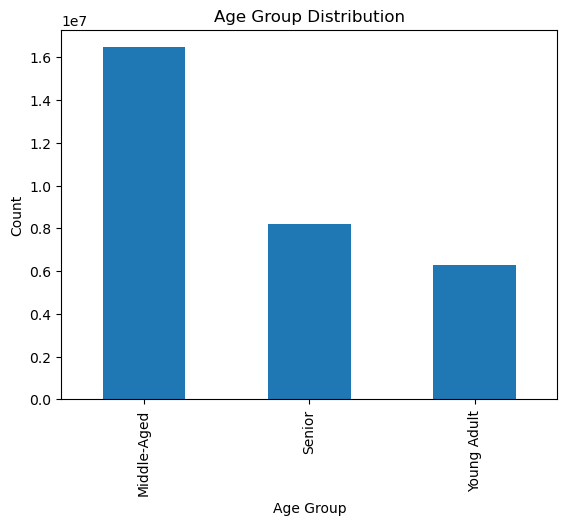

In [64]:
# Age Group Visualization

bar_age = df_2['age_group'].value_counts().plot.bar()
plt.title('Age Group Distribution')
plt.xlabel('Age Group')
plt.ylabel('Count')

Text(0, 0.5, '')

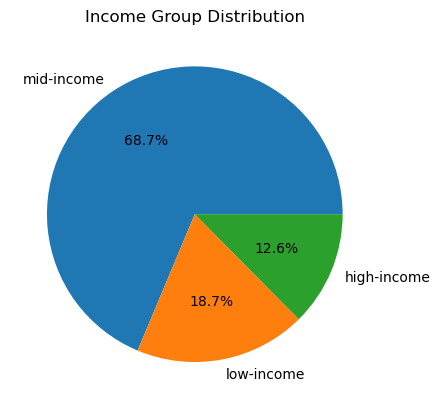

In [65]:
# Income Group Visualization

income_group_count = df_2['income_group'].value_counts()
pie_income = df_2['income_group'].value_counts().plot.pie(labels = income_group_count.index, 
        autopct='%.1f%%')
plt.title('Income Group Distribution')
plt.ylabel('')

Text(0, 0.5, '')

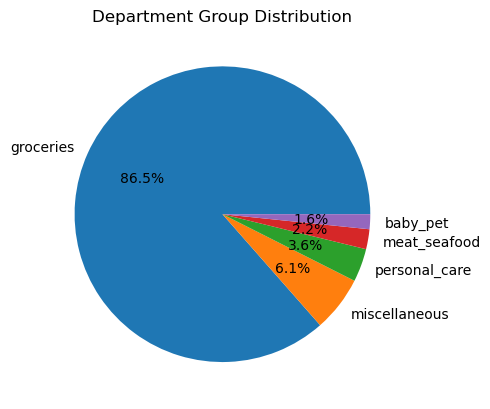

In [66]:
# Department Group Visualization

department_group_count = df_2['department_group'].value_counts()
pie_department = df_2['department_group'].value_counts().plot.pie(labels = department_group_count.index, 
        autopct='%.1f%%')
plt.title('Department Group Distribution')
plt.ylabel('')

Text(0, 0.5, 'Count')

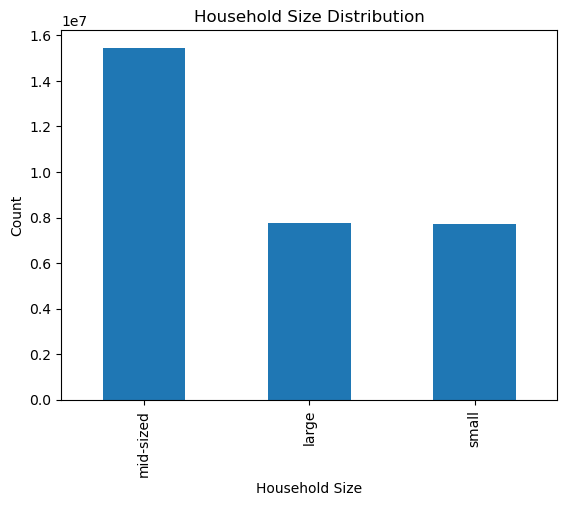

In [67]:
# Number of Dependants Visualization

bar_household_size = df_2['household_size'].value_counts().plot.bar()
plt.title('Household Size Distribution')
plt.xlabel('Household Size')
plt.ylabel('Count')

Text(0, 0.5, '')

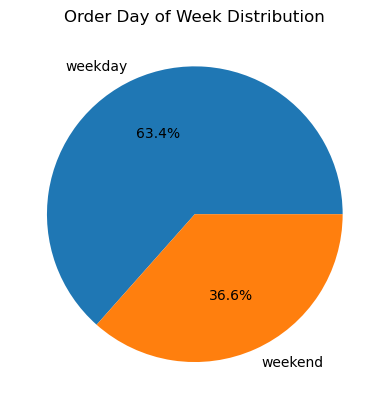

In [68]:
# Order Day of Week Visualization

day_of_order_count = df_2['day_of_order_group'].value_counts()
pie_day_of_order = df_2['day_of_order_group'].value_counts().plot.pie(labels = day_of_order_count.index, 
        autopct='%.1f%%')
plt.title('Order Day of Week Distribution')
plt.ylabel('')

Text(0, 0.5, 'Count')

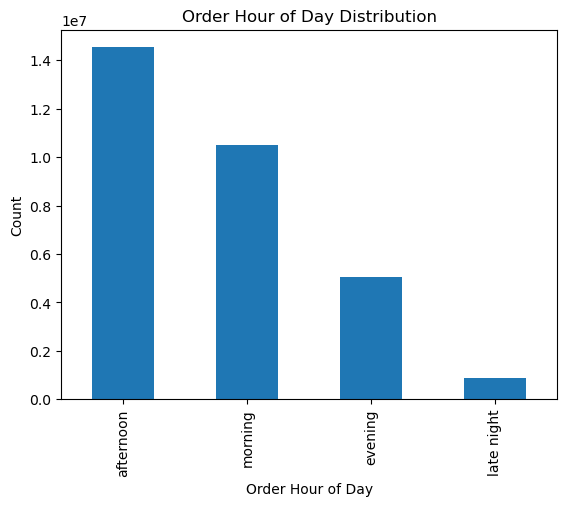

In [69]:
# Order Hour of Day Visualization

bar_hour_of_order = df_2['hour_of_order_group'].value_counts().plot.bar()
plt.title('Order Hour of Day Distribution')
plt.xlabel('Order Hour of Day')
plt.ylabel('Count')

In [70]:
#export visualizations

bar_age.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_age_group_distribution.png'), bbox_inches='tight')
pie_income.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'pie_income_group_distribution.png'), bbox_inches='tight')
pie_department.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'pie_department_group_distribution.png'), bbox_inches='tight')
bar_household_size.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_number_of_dependants_distribution_.png'), bbox_inches='tight')
pie_day_of_order.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'pie_order_day_of_week_distribution.png'), bbox_inches='tight')
bar_hour_of_order.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_order_time_of_day_distribution_.png'), bbox_inches='tight')

## 7. Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

In [119]:
df_2.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,busiest_day,price_range_loc,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_spend,spender_flag,order_frequency,Customer_frequency_flag,first_name,last_name,gender,state,age,date_joined,number_of_dependants,marital_status,income,_merge,region,activity_flag,age_group,income_group,department_group,household_size,day_of_order_group,hour_of_order_group
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,3.0,5,0,Regularly busy,Mid-range product,Regularly busy,Most orders,32,Regular customer,6.935811,Low spender,8.0,Frequent customer,Charles,Cox,Male,Minnesota,81,2019-08-01,1,married,49620,both,Midwest,high-activity,Senior,low-income,groceries,mid-sized,weekday,morning
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,20.0,1,1,Regularly busy,Mid-range product,Regularly busy,Average orders,32,Regular customer,6.935811,Low spender,8.0,Frequent customer,Charles,Cox,Male,Minnesota,81,2019-08-01,1,married,49620,both,Midwest,high-activity,Senior,low-income,groceries,mid-sized,weekday,afternoon
2,1,Chocolate Sandwich Cookies,61,19,5.8,389851,709,2,0,21,6.0,20,0,Busiest day,Mid-range product,Busiest days,Average orders,5,New customer,7.930208,Low spender,8.0,Frequent customer,Deborah,Glass,Female,Vermont,66,2018-06-16,2,married,158302,both,Northeast,high-activity,Senior,high-income,groceries,mid-sized,weekend,evening
5,1,Chocolate Sandwich Cookies,61,19,5.8,1701441,777,16,1,7,26.0,7,0,Regularly busy,Mid-range product,Busiest days,Average orders,26,Regular customer,6.935398,Low spender,11.0,Regular customer,Christina,Wallace,Female,Hawaii,51,2019-01-04,2,married,57797,both,West,high-activity,Middle-Aged,low-income,groceries,mid-sized,weekend,morning
6,1,Chocolate Sandwich Cookies,61,19,5.8,1871483,825,3,2,14,30.0,2,0,Regularly busy,Mid-range product,Regularly busy,Most orders,9,New customer,5.957576,Low spender,20.0,Regular customer,nan,Parks,Male,District of Columbia,20,2019-05-08,3,living with parents and siblings,34171,both,South,high-activity,Young Adult,low-income,groceries,large,weekday,afternoon


In [120]:
# create subset
df_profile = df_2.groupby(['user_id', 'age_group', 'income_group', 'Customer_frequency_flag', 'region', 'household_size', 'hour_of_order_group', 'days_since_prior_order'])['prices'].sum().reset_index()

In [121]:
# check subset 
df_profile

,user_id,age_group,income_group,Customer_frequency_flag,region,household_size,hour_of_order_group,days_since_prior_order,prices
0,1,Middle-Aged,low-income,Non-frequent customer,South,large,afternoon,0.0,40.2
1,1,Middle-Aged,low-income,Non-frequent customer,South,large,afternoon,14.0,40.2
2,1,Middle-Aged,low-income,Non-frequent customer,South,large,afternoon,21.0,28.2
3,1,Middle-Aged,low-income,Non-frequent customer,South,large,afternoon,28.0,57.0
4,1,Middle-Aged,low-income,Non-frequent customer,South,large,morning,15.0,35.4
...,...,...,...,...,...,...,...,...,...
1892033,206209,Senior,mid-income,Non-frequent customer,Midwest,large,afternoon,9.0,77.1
1892034,206209,Senior,mid-income,Non-frequent customer,Midwest,large,afternoon,18.0,131.5
1892035,206209,Senior,mid-income,Non-frequent customer,Midwest,large,afternoon,22.0,101.4
1892036,206209,Senior,mid-income,Non-frequent customer,Midwest,large,evening,29.0,64.7


### Aggregation by Age

In [123]:
# calculating min, mean, and max for age groups for usage frequency and expenditure
age_agg = df_profile.groupby('age_group').agg({'days_since_prior_order' : ['min', 'mean', 'max'], 'prices' : ['min', 'mean', 'max']})

In [124]:
# checking aggregation results
age_agg

days_since_prior_order                  prices              \
                               min       mean   max    min        mean   
age_group                                                                
Middle-Aged                    0.0  11.931430  30.0    1.0  120.815149   
Senior                         0.0  11.903024  30.0    1.0  120.065756   
Young Adult                    0.0  11.950454  30.0    1.0  121.008037   

                      
                 max  
age_group             
Middle-Aged  11288.1  
Senior       11813.0  
Young Adult   7109.0

### Aggregation by Income

In [126]:
# calculating min, mean, and max for income groups for usage frequency and expenditure
income_agg = df_profile.groupby('income_group').agg({'days_since_prior_order' : ['min', 'mean', 'max'], 'prices' : ['min', 'mean', 'max']})

# check aggreagation results
income_agg

days_since_prior_order                  prices              \
                                min       mean   max    min        mean   
income_group                                                              
high-income                     0.0  11.717436  30.0    1.0  129.103580   
low-income                      0.0  12.356307  30.0    1.0   91.989762   
mid-income                      0.0  11.820687  30.0    1.0  128.838852   

                       
                  max  
income_group           
high-income    8450.0  
low-income     7109.0  
mid-income    11813.0

### Aggregation by Number of Dependants

In [128]:
# calculating min, mean, and max for household size groups for usage frequency and expenditure
household_agg = df_profile.groupby('household_size').agg({'days_since_prior_order' : ['min', 'mean', 'max'], 'prices' : ['min', 'mean', 'max']})

# check aggreagation results
household_agg

days_since_prior_order                  prices              \
                                  min       mean   max    min        mean   
household_size                                                              
large                             0.0  11.913659  30.0    1.0  120.787885   
mid-sized                         0.0  11.930829  30.0    1.0  120.596451   
small                             0.0  11.935651  30.0    1.0  120.637800   

                         
                    max  
household_size           
large            7917.3  
mid-sized        8525.2  
small           11813.0

### Aggregation by Order Hour of Day

In [130]:
# calculating min, mean, and max for order hour of day groups for usage frequency and expenditure
hour_of_order_agg = df_profile.groupby('hour_of_order_group').agg({'days_since_prior_order' : ['min', 'mean', 'max'], 'prices' : ['min', 'mean', 'max']})

# check aggreagation results
hour_of_order_agg

days_since_prior_order                  prices  \
                                       min       mean   max    min   
hour_of_order_group                                                  
afternoon                              0.0  12.156666  30.0    1.0   
evening                                0.0  11.346969  30.0    1.0   
late night                             0.0  11.369729  30.0    1.0   
morning                                0.0  12.013589  30.0    1.0   

                                          
                           mean      max  
hour_of_order_group                       
afternoon            126.506572  11813.0  
evening              103.362134   5714.5  
late night            93.268064   2370.7  
morning              125.728858   8525.2